# Data Gathering

## Modified data

Instagram is one of the most popular and famous platforms for users to network, post their daily lives. There are a lot of famous internet influencers here. Instagram is also one of the important parts for wemedia to develop. Users can create channels to post their daily lives, show their abilities, post some fun videos in order to attract more fans. Ad sellers also analyze their business value to contact instagram influencers to promote their products in order to gain more benefits. 

In this dataset, it clearly shows followers'number, average likes each post, country etc. I would like to use this dataset to deeper analyze the trend of internet influencers followers. Country distribution of these influencers. More than this, I would like to use other datasets to locate the fields which these inernet influencers focus to further analyze factors of these internet influencers. What makes them success. 

channel info: Username in instagram

influence score: It is calculated based on their popularity.

posts: total posts they have

followers: total followers they have

avg_likes: average likes of their total posts

60_days_eng_rate: 60 days of engagement rate

new_post_avg_like: a calculation of the average likes they gained from new posts. 

total_likes: total likes of their posts in instagram.

country: users' origin. What countries they from?

In [9]:
 import pandas as pd
 instagram_infl = pd.read_csv("/Users/yangyilin/Desktop/anly-501-project-YilinYang2000-1/data/00-raw-data/top_insta_influencers_data.csv")
 instagram_infl

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


## Twitter API in python

Python: I used twitter API to scratch mutiple keywords:"media" "internet influencers" "consumers" "data" to gather comments from twiter about their opinion about the wemedia. I use these data to analyze the positive and negative opinion. I can detect the internet users' attitudes to consumers' privacy. I can also use this datasets to define the relationship between data and media. The keywords may not clear enough for me to analysis but I will adjust it later for future research. I used for loop to search over 600 tweets in order to make comprehensive datasets. I will collect more in the future to scratch over 2000 tweets in order to make sure my results are accurate. I plan to detect the frequency of words to gain a plot. More than this, I plan to use Naive Bytes to give each tweet a positive or negative attitude.

In [10]:
import json 

# READ FILE
f = open("/Users/yangyilin/Desktop/2022-fall-anly/501/lab/lab1.2/api-keys.json")
input=json.load(f); #print(input)

# LOAD KEYS INTO API
consumer_key=input["consumer_key"]    
consumer_secret=input["consumer_secret"]    
access_token=input["access_token"]    
access_token_secret=input["access_token_secret"]    
bearer_token=input["bearer_token"]  

In [11]:
import tweepy
import requests
# Set up Connection
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [12]:
# Add the search_twitter function here.
def search_twitter(query, max_results,tweet_fields, bearer_token = bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    url = "https://api.twitter.com/2/tweets/search/recent?query={}&max_results={}&{}".format(query, max_results,tweet_fields)
    print("--------------",url,"--------------")
    response = requests.request("GET", url, headers=headers)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [13]:
tweet_fields = "tweet.fields=text,author_id,created_at,lang"

In [14]:
data = "/Users/yangyilin/Desktop/2022-fall-anly/501/project"
search_tweets = ['media','internet influencer','data','consumer privacy']
for idx,val in enumerate(search_tweets):
    tweets_jsondump = []
    json_response1 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token)
    json_response2 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token)
    json_response3 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token)
    json_response4 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token)
    json_response5 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token)
    json_response6 = search_twitter(query = str(val), max_results = 100, tweet_fields = tweet_fields, bearer_token=bearer_token)
    for i in json_response1['data']:
        tweets_jsondump.append(i)
    for i in json_response2['data']:
        tweets_jsondump.append(i)
    for i in json_response3['data']:
        tweets_jsondump.append(i)
    for i in json_response4['data']:
        tweets_jsondump.append(i)
    for i in json_response5['data']:
        tweets_jsondump.append(i)
    for i in json_response6['data']:
        tweets_jsondump.append(i)
    with open(data+str(val)+'.json','w') as json_file:
        json.dump(tweets_jsondump,json_file)
        json_file.close()

-------------- https://api.twitter.com/2/tweets/search/recent?query=media&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=media&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=media&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=media&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=media&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=media&max_results=100&tweet.fields=text,author_id,created_at,lang --------------
-------------- https://api.twitter.com/2/tweets/search/recent?query=internet influencer&max_results=100&tw

In [15]:
from pandas import json_normalize 
import pandas as pd
twitterdf1 = json_normalize(json_response1,"data")
twitterdf2 = json_normalize(json_response2,"data")
twitterdf3 = json_normalize(json_response3,"data")
twitterdf4 = json_normalize(json_response4,"data")
twitterdf5 = json_normalize(json_response5,"data")
twitterdf6 = json_normalize(json_response6,"data")
twitterdf = [twitterdf1,twitterdf2,twitterdf3,twitterdf4,twitterdf5,twitterdf6]
twitterdf = pd.concat(twitterdf)
twitterdf

,id,lang,author_id,created_at,text
0,1574462548027609090,en,1523745650432741377,2022-09-26T18:14:58.000Z,RT @relyanceai: Action by California Attorney ...
1,1574460821073268738,en,377867202,2022-09-26T18:08:06.000Z,Join @IDology and @AiteNovarica on October 12t...
2,1574459562412822528,en,746303248198303744,2022-09-26T18:03:06.000Z,RT @relyanceai: Action by California Attorney ...
3,1574457040243916800,en,1227402972990099456,2022-09-26T17:53:05.000Z,Action by California Attorney General Shows En...
4,1574453153986056192,en,870794599085879298,2022-09-26T17:37:38.000Z,RT @deanhager: Welcome @ZecOps to the @JamfSof...
...,...,...,...,...,...
94,1574017323471626240,en,1573961278950973440,2022-09-25T12:45:48.000Z,RT @THORmaximalist: I'm so impressed with @ses...
95,1574014969129193472,en,882857886388453376,2022-09-25T12:36:27.000Z,RT @nathanbaugh27: Apple surpassed $3.5B in an...
96,1574013687366447104,en,13479072,2022-09-25T12:31:21.000Z,Data breaches are now part of mainstream repor...
97,1573988777818718209,en,1193851386741612544,2022-09-25T10:52:22.000Z,We are now entering a new era of consumer inte...


In [17]:
twitterdf.to_csv("/Users/yangyilin/Desktop/anly-501-project-YilinYang2000-1/data/00-raw-data/twitterpython.csv")

## Twitter API in R

For R API, I used twitter to scratch keywords like "instagram, tiktok, youtube, facebook" to scratch users' attitudes about these platforms. 

In [1]:
library(selectr)
library(rvest)
library(xml2)
library(rtweet) # for scraping tweets
library(wordcloud2) # for generating really cool looking wordclouds
library(tm) # for text minning
library(dplyr) # loads of fun stuff including piping
library(ROAuth)
library(jsonlite)
library(httpuv)

Loading required package: NLP


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘jsonlite’


The following object is masked from ‘package:rtweet’:

    flatten




In [2]:
consumer_key = "9TVmMW3pyds9CwlMhgXBK5Bu5"
consumer_secret = "lTXYO7I5nKTGOp7zJG7jtf7dCmYoQLtbgB4a0w6BZN6ct4mNxT"
access_token = "1553871190036516864-ahw9mcZ1pq36DzwsD7CFgvU0iMnOy4"
access_token_secret = "8DhWYScYuF6KofqS9Gt7ajYs7B4DZKkZSBhoMPgyfnTFp"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAOfFfQEAAAAARkEQiS1bfu9c96%2FD%2FvzbetKGYZk%3DKNBdl2kUeIysZ9wV6n6O4X3zp5enoR6Onp6LqEKQVldRKaDcum"

In [3]:
library(twitteR)
requestURL='https://api.twitter.com/oauth/request_token'
accessURL='https://api.twitter.com/oauth/access_token'
authURL='https://api.twitter.com/oauth/authorize'

s_key  = 'instagram OR tik tok OR facebook OR youtube'
n_tweets = 250 

twitteR:::setup_twitter_oauth(consumer_key, consumer_secret,access_token,access_token_secret)
Search1<-twitteR::searchTwitter(s_key,n=n_tweets, since="2022-04-01",lang="en")


Attaching package: ‘twitteR’


The following objects are masked from ‘package:dplyr’:

    id, location


The following object is masked from ‘package:rtweet’:

    lookup_statuses




[1] "Using direct authentication"


In [4]:
TweetsDF<- twListToDF(Search1)
TweetsDF

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
<chr>,<lgl>,<dbl>,<chr>,<dttm>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>
RT @SeanBurkeShow: I am begging BEGGING the people of Tik Tok to learn what POV means.,FALSE,0,NA,2022-09-26 21:56:31,FALSE,NA,1574518304827269120,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",inkyturtley,129,TRUE,FALSE,NA,NA
RT @SkylieJ_: I posted my mom wearing my brand on tik tok and she went viral 🤩 https://t.co/XiuiTtPWGV,FALSE,0,NA,2022-09-26 21:56:30,FALSE,NA,1574518302042226688,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Omgschlim,915,TRUE,FALSE,NA,NA
RT @SkylieJ_: I posted my mom wearing my brand on tik tok and she went viral 🤩 https://t.co/XiuiTtPWGV,FALSE,0,NA,2022-09-26 21:56:25,FALSE,NA,1574518278550085633,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",BecominGreat,915,TRUE,FALSE,NA,NA
RT @SkylieJ_: I posted my mom wearing my brand on tik tok and she went viral 🤩 https://t.co/XiuiTtPWGV,FALSE,0,NA,2022-09-26 21:56:24,FALSE,NA,1574518272766054400,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",__Jvys__,915,TRUE,FALSE,NA,NA
"RT @CascadeIceWater: #GIVEAWAY ALERT! It’s officially fall, and we are feelin’ it! To win free Cascade Ice, “like” this tweet + reply with…",FALSE,0,NA,2022-09-26 21:56:23,FALSE,NA,1574518269335117824,NA,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",heathermahley,101,TRUE,FALSE,NA,NA
"RT @10KDunkin: The period uhhh girl from tik tok jus got signed , dat jus stamped music isn’t bout talent no more its bout tik tok views",FALSE,0,NA,2022-09-26 21:56:21,FALSE,NA,1574518262997532672,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",gasspaxkshawty,67,TRUE,FALSE,NA,NA
RT @SkylieJ_: I posted my mom wearing my brand on tik tok and she went viral 🤩 https://t.co/XiuiTtPWGV,FALSE,0,NA,2022-09-26 21:56:15,FALSE,NA,1574518235608801282,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Prieannasmom,915,TRUE,FALSE,NA,NA
Meta makes it easier to switch between Facebook and Instagram accounts - CNBC https://t.co/PzAY7N4dBr via @GoogleNews 😆,FALSE,0,NA,2022-09-26 21:56:14,FALSE,NA,1574518233251475456,NA,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",OTheMiracle,0,FALSE,FALSE,NA,NA
RT @longliveswift22: Imagine being on Tik tok making the stupidest theory videos that make NO fucking sense,FALSE,0,NA,2022-09-26 21:56:13,FALSE,NA,1574518228604313629,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Wasabiboys,1,TRUE,FALSE,NA,NA


In [11]:
write.csv(TweetsDF,"/Users/yangyilin/Desktop/anly-501-project-YilinYang2000-1/data/00-raw-data/tweetinr.csv")

In [5]:
FName = "~/Desktop/wemediaexample.txt"
MyFile <- file(FName)
cat(unlist(TweetsDF), " ", file=MyFile, sep="\n")
close(MyFile)

In [6]:
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")

Loading required package: RColorBrewer



In [7]:
twittertext = Corpus(VectorSource(TweetsDF$text))
toSpace = content_transformer(
              function (x, pattern)
              gsub(pattern, " ", x))
twittertext1 = tm_map(twittertext, toSpace, "/")
twittertext1 = tm_map(twittertext, toSpace, "@")
twittertext1 = tm_map(twittertext, toSpace, "#")
strwrap(twittertext1)

Warning message in tm_map.SimpleCorpus(twittertext, toSpace, "/"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(twittertext, toSpace, "@"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(twittertext, toSpace, "#"):
“transformation drops documents”


[1] "c(\"RT @SeanBurkeShow: I am begging BEGGING the people of Tik Tok to"         
  [2] "learn what POV means.\", \"RT @SkylieJ_: I posted my mom wearing my brand"    
  [3] "on tik tok and she went viral 🤩 https://t.co/XiuiTtPWGV\", \"RT"             
  [4] "@SkylieJ_: I posted my mom wearing my brand on tik tok and she went"          
  [5] "viral 🤩 https://t.co/XiuiTtPWGV\", \"RT @SkylieJ_: I posted my mom"          
  [6] "wearing my brand on tik tok and she went viral 🤩"                            
  [7] "https://t.co/XiuiTtPWGV\", \"RT @CascadeIceWater: GIVEAWAY ALERT! It’s"       
  [8] "officially fall, and we are feelin’ it! To win free Cascade Ice, “like”"      
  [9] "this tweet + reply with…\", \"RT @10KDunkin: The period uhhh girl from"       
 [10] "tik tok jus got signed , dat jus stamped music isn’t bout talent no"          
 [11] "more its bout tik tok views\", \"RT @SkylieJ_: I posted my mom wearing my"    
 [12] "brand on tik tok and she went viral 🤩 https://t.co/XiuiTtPWGV\", \"Meta"     
 [13] "makes it easier to switch between Facebook and Instagram accounts -"          
 [14] "CNBC https://t.co/PzAY7N4dBr via @GoogleNews \\n😆\", \"RT"                   
 [15] "@longliveswift22: Imagine being on Tik tok making the stupidest theory"       
 [16] "videos that make NO fucking sense\", \"RT @alOakhwan: It's like when"         
 [17] "women buy a really ugly pug and dress it up in gаy little outfits for"        
 [18] "tik tok\", \"RT @HermesIyele: Awwwwww, Hermes drops a heartfelt message"      
 [19] "to the fans on WhatsApp groups.\\n\\nTwitter, Facebook and Instagram"         
 [20] "people wait for…\", \"RT @SkylieJ_: I posted my mom wearing my brand on"      
 [21] "tik tok and she went viral 🤩 https://t.co/XiuiTtPWGV\", \"RT @SkylieJ_:"     
 [22] "I posted my mom wearing my brand on tik tok and she went viral 🤩"            
 [23] "https://t.co/XiuiTtPWGV\", \"RT @BarefootCampus: It's time for another"       
 [24] "barefoot6packgiveaway !!!\\nHow to enter: \\n⚡Follow us\\n⚡Like this"       
 [25] "tweet\\n⚡Retweet this tweet\\n\\nWinner…\", \"RT @SkylieJ_: I posted my mom" 
 [26] "wearing my brand on tik tok and she went viral 🤩"                            
 [27] "https://t.co/XiuiTtPWGV\", \"RT @SkylieJ_: I posted my mom wearing my"        
 [28] "brand on tik tok and she went viral 🤩 https://t.co/XiuiTtPWGV\", \"BEST"     
 [29] "CENTER ON 2K23 - !Twitter !Instagram !TikTok !YouTube"                        
 [30] "\\n\\nhttps://t.co/Oo0LhH5JAK https://t.co/glzKQcSaWM\", \"RT @SkylieJ_: I"   
 [31] "posted my mom wearing my brand on tik tok and she went viral 🤩"              
 [32] "https://t.co/XiuiTtPWGV\", \"My socials for people to reach out to me and"    
 [33] "follow my other content. This contains my Twitter, Instagram,…"               
 [34] "https://t.co/v0Coov8B1n\", \"@ShiLLin_ViLLian Your being a @barkmeta now"     
 [35] "on Tik Tok 🤦‍♂️\", \"RT @SkylieJ_: I posted my mom wearing my brand on tik"    
 [36] "tok and she went viral 🤩 https://t.co/XiuiTtPWGV\", \"Awwwwww, Hermes"       
 [37] "drops a heartfelt message to the fans on WhatsApp groups.\\n\\nTwitter,"      
 [38] "Facebook and Instagram people w… https://t.co/HqvUWqyfPE\", \"RT"             
 [39] "@SkylieJ_: I posted my mom wearing my brand on tik tok and she went"          
 [40] "viral 🤩 https://t.co/XiuiTtPWGV\", \"RT @SkylieJ_: I posted my mom"          
 [41] "wearing my brand on tik tok and she went viral 🤩"                            
 [42] "https://t.co/XiuiTtPWGV\", \"@lastSonOfCy Wait nvm one lady on tik tok"       
 [43] "said so\", \"RT @FarrisFlagg: Watching TheJenniferHudsonShow on @FOXLA!"      
 [44] "Weekdays at 12pm!  ImWithJHud! Follow @JHudShow on @Twitter,"                 
 [45] "@instagram, @faceb…\", \"RT @bengaljims_BTR: We’re partnering w"              
 [46] "@goldstarchili, Official Chili of the Bengals, to give 2 tix to TNF vs"       
 [47] "Dolphins \\n\\nTO ENTER follow…\", \"@_danyellb Tik To

In [8]:
twittertext1 = tm_map(twittertext1, content_transformer(tolower))
twittertext1 = tm_map(twittertext1, removeNumbers)
twittertext1 = tm_map(twittertext1, stripWhitespace)

Warning message in tm_map.SimpleCorpus(twittertext1, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(twittertext1, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(twittertext1, stripWhitespace):
“transformation drops documents”


In [9]:
twittertm = TermDocumentMatrix(twittertext1)
m = as.matrix(twittertm)
v = sort(rowSums(m), 
         decreasing = TRUE)
d = data.frame(word = names(v),
               freq = v)
head(d, 10)

,word,freq
,<chr>,<dbl>
tik,tik,166
tok,tok,162
and,and,140
brand,brand,90
she,she,90
viral,viral,90
wearing,wearing,90
posted,posted,88
@skyliej_:,@skyliej_:,87


Warning message in strwidth(words[i], cex = size[i], ...):
“conversion failure on '🤩' in 'mbcsToSbcs': dot substituted for <f0>”
Warning message in strwidth(words[i], cex = size[i], ...):
“conversion failure on '🤩' in 'mbcsToSbcs': dot substituted for <9f>”
Warning message in strwidth(words[i], cex = size[i], ...):
“conversion failure on '🤩' in 'mbcsToSbcs': dot substituted for <a4>”
Warning message in strwidth(words[i], cex = size[i], ...):
“conversion failure on '🤩' in 'mbcsToSbcs': dot substituted for <a9>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversion failure on '🤩' in 'mbcsToSbcs': dot substituted for <f0>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversion failure on '🤩' in 'mbcsToSbcs': dot substituted for <9f>”
Warning message in text.default(x1, y1, words[i], cex = size[i], offset = 0, srt = rotWord * :
“conversion failure on '🤩' in 'mbcsToSbcs': dot substituted

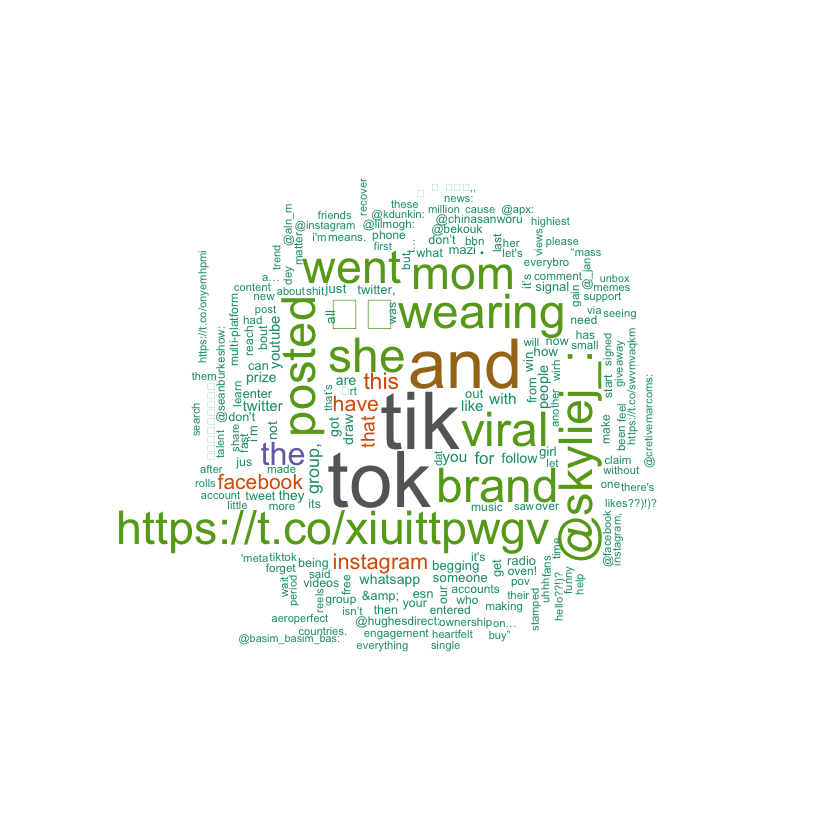

In [10]:
wordcloud(words = d$word, 
          freq = d$freq,
          min.freq = 1, 
          max.words = 200,
          random.order = FALSE, 
          rot.per = 0.35, 
          colors = brewer.pal(8, "Dark2"))